In [31]:
!pip install --upgrade tf-keras-vis tensorflow

In [32]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

1 GPUs


In [33]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
layer_name = "block5_conv3"

def model_modifier(current_model):
  target_layer = current_model.get_layer(name=layer_name)
  new_model = tf.keras.Model(inputs=current_model.inputs,
                             outputs=target_layer.output)
  new_model.layers[-1].activation = tf.keras.activations.linear
  return new_model

In [35]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)

In [36]:
filter_number = 7
def loss(output):
    return output[..., filter_number]

In [37]:
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

<timed exec>:3: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[609.6702270507812]],	Regularization: [('TotalVariation2D', [10.202242851257324]), ('Norm', [38.282405853271484])]
Steps: 100	Scores: [[877.9427490234375]],	Regularization: [('TotalVariation2D', [11.474024772644043]), ('Norm', [38.738155364990234])]
Steps: 150	Scores: [[985.2596435546875]],	Regularization: [('TotalVariation2D', [11.318140029907227]), ('Norm', [39.14615249633789])]
Steps: 200	Scores: [[930.4992065429688]],	Regularization: [('TotalVariation2D', [10.797987937927246]), ('Norm', [39.49427032470703])]


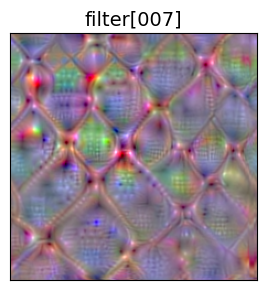

CPU times: user 12.6 s, sys: 202 ms, total: 12.8 s
Wall time: 12.6 s


In [38]:
%%time
from tf_keras_vis.utils.callbacks import Print

activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }

f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
filter_numbers = [52, 121, 320]

def loss(output):
  return (output[0, ..., 52], output[1, ..., 121], output[2, ..., 320])

In [40]:
seed_inputs = tf.random.uniform((3, 224, 224, 3), 0, 255)

<timed exec>:3: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[137.98526000976562, 940.9114379882812, 395.5758056640625]],	Regularization: [('TotalVariation2D', [5.896312236785889, 13.252571105957031, 8.837977409362793]), ('Norm', [38.143463134765625, 38.34614944458008, 38.240352630615234])]
Steps: 100	Scores: [[232.9641876220703, 1019.6026000976562, 495.14727783203125]],	Regularization: [('TotalVariation2D', [5.935966491699219, 11.966113090515137, 8.630475997924805]), ('Norm', [38.1866340637207, 38.720943450927734, 38.43156433105469])]
Steps: 150	Scores: [[280.8197021484375, 1226.9876708984375, 639.3048706054688]],	Regularization: [('TotalVariation2D', [6.889669418334961, 13.222325325012207, 10.030714988708496]), ('Norm', [38.279388427734375, 39.10861587524414, 38.69837951660156])]
Steps: 200	Scores: [[285.3379211425781, 983.3726196289062, 578.582763671875]],	Regularization: [('TotalVariation2D', [6.567320346832275, 11.263321876525879, 9.156158447265625]), ('Norm', [38.36339569091797, 39.42360305786133, 38.94794845581055])]


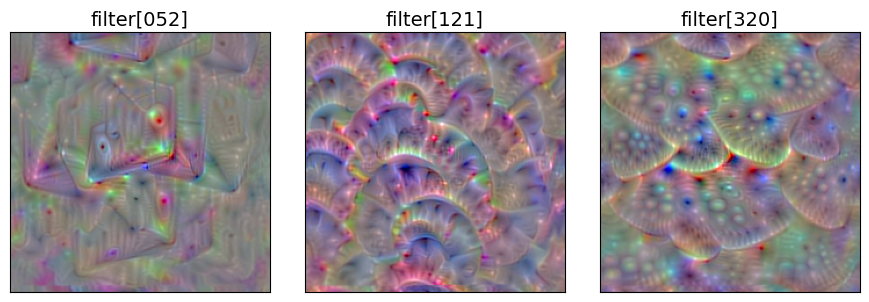

CPU times: user 16.7 s, sys: 350 ms, total: 17.1 s
Wall time: 16.6 s


In [41]:
%%time

activations = activation_maximization(loss,
                                     seed_input=seed_inputs,
                                     callbacks=[Print(interval=50)])

images = [activation.astype(np.uint8) for activation in activations]

subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, filter_number in enumerate(filter_numbers):
  ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
  ax[i].imshow(images[i])

plt.tight_layout()
plt.show()

In [42]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

1 GPUs


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
def model_modifier(m):
  m.layers[-1].activation = tf.keras.activations.linear

In [44]:
activation_maximization = ActivationMaximization(model,
                                                 model_modifier,
                                                 clone=False)

In [45]:
def loss(output):
    return output[:, 20]

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[35.64332580566406]],	Regularization: [('TotalVariation2D', [4.1009297370910645]), ('Norm', [38.10696029663086])]
Steps: 100	Scores: [[74.8088150024414]],	Regularization: [('TotalVariation2D', [4.720970630645752]), ('Norm', [38.03472137451172])]
Steps: 150	Scores: [[93.70962524414062]],	Regularization: [('TotalVariation2D', [4.970911026000977]), ('Norm', [38.013450622558594])]
Steps: 200	Scores: [[136.90792846679688]],	Regularization: [('TotalVariation2D', [5.665314674377441]), ('Norm', [38.02714157104492])]


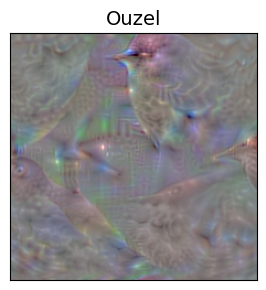

CPU times: user 13.5 s, sys: 213 ms, total: 13.7 s
Wall time: 13.5 s


In [46]:
%%time

from tf_keras_vis.utils.callbacks import Print

activation = activation_maximization(loss,
                                     callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('Ouzel', fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

def loss(output):
    return (output[0, 1], output[1, 294], output[2, 413])

In [57]:
seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[100.44660186767578, 44.77400588989258, 8.39302921295166]],	Regularization: [('TotalVariation2D', [5.5981950759887695, 4.32503080368042, 3.1638054847717285]), ('Norm', [38.1967887878418, 38.15482711791992, 38.11193084716797])]
Steps: 100	Scores: [[185.01199340820312, 89.37296295166016, 66.45692443847656]],	Regularization: [('TotalVariation2D', [5.694371700286865, 4.129044055938721, 3.798415422439575]), ('Norm', [38.23630142211914, 38.096534729003906, 38.03833770751953])]
Steps: 150	Scores: [[213.37477111816406, 124.0439682006836, 106.42633819580078]],	Regularization: [('TotalVariation2D', [6.365406513214111, 5.101645469665527, 4.767146110534668]), ('Norm', [38.32059860229492, 38.0946044921875, 38.009788513183594])]
Steps: 200	Scores: [[227.14234924316406, 105.02428436279297, 99.49713134765625]],	Regularization: [('TotalVariation2D', [6.105311870574951, 4.755890846252441, 4.342641830444336]), ('Norm', [38.40192794799805, 38.0971794128418, 37.98282241821289])]
Steps: 

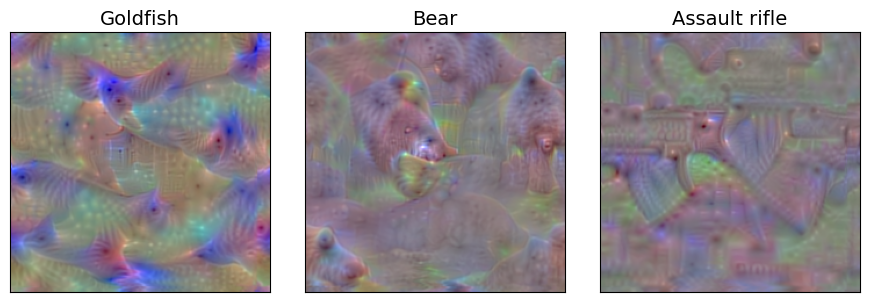

CPU times: user 45.5 s, sys: 494 ms, total: 46 s
Wall time: 45.4 s


In [58]:
%%time

activations = activation_maximization(loss,
                                      seed_input=seed_input,
                                      steps=512,
                                      callbacks=[ Print(interval=50)])
images = [activation.astype(np.uint8) for activation in activations]

subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()

plt.show()